# Test Train Split and Cross Validation

## Review of train/test validation methods

We've discussed overfitting, underfitting, and how to validate the "generalizeability" of your models by testing them on unseen data. 

In this lab you'll practice two related validation methods: 
1. **train/test split**
2. **k-fold cross-validation**

Train/test split and k-fold cross-validation both serve two useful purposes:
- We prevent overfitting by not using all the data, and
- We retain some remaining data to evaluate our model.

In the case of cross-validation, the model fitting and evaluation is performed multiple times on different train/test splits of the data.

Ultimately we can the training and testing validation framework to compare multiple models on the same dataset. This could be comparisons of two linear models or of completely different models on the same data.

## Instructions

For your independent practice, fit **three different models** on the Boston housing data. For example, you could pick three different subsets of variables, one or more polynomial models, or any other model that you like. 

**Start with train/test split validation:**
* Fix a testing/training split of the data
* Train each of your models on the training data
* Evaluate each of the models on the test data
* Rank the models by how well they score on the testing data set.

**Then try K-Fold cross-validation:**
* Perform a k-fold cross validation and use the cross-validation scores to compare your models. Did this change your rankings?
* Try a few different K-splits of the data for the same models.

If you're interested, try a variety of response variables.  We start with **MEDV** (the `.target` attribute from the dataset load method).

In [173]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

%matplotlib inline

In [174]:
from sklearn.datasets import load_boston
boston = load_boston()

X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

In [175]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], 
      dtype='<U7')

### 1. Clean up any data problems

Load the Boston housing data.  Fix any problems, if applicable.

In [176]:
'''Validating the Features Data frame'''
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


### 2. Select 3-4 variables with your dataset to perform a 50/50 test train split on

- Train your model on the the **training** data
- Score and plot your predictions for the **test** data (i.e., a scatter plot of actual y values versus predicted y values)
- How well did your model do?

In [177]:
'''Selecting the Predictors'''
new_X = X[['RM', 'LSTAT', 'PTRATIO', 'AGE']].copy()

'''Defining the Dependent Variable'''
new_Y = pd.DataFrame(y)

'''Using the Test Train Split Approach'''
new_XTrain, new_XTest, new_YTrain, new_YTest = train_test_split(new_X, new_Y, test_size = 0.5)
print (new_XTrain.shape, new_YTrain.shape, new_XTest.shape, new_YTest.shape)


'''Linear Regression'''
lr = LinearRegression()
lr.fit(new_XTrain, new_YTrain)

'''Validating the Model Score'''
print ('Model Score with Training Data:', lr.score(new_XTrain, new_YTrain))

(253, 4) (253, 1) (253, 4) (253, 1)
Model Score with Training Data: 0.681579543018


We see that the training and the test data has been split equally 

In [178]:
'''Validating the Model with the Test Data '''
print ('Model Score with Test Data:', lr.score(new_XTest, new_YTest))

Model Score with Test Data: 0.667045053956


### 3. Try ratios of 70/30 and 90/10 for the training set to test set

- Score and plot your test set (i.e., a scatter plot of actual y values versus predicted y values)
- How does the score change across both of them?

# Test size of 70/30

In [179]:

'''Selecting the Predictors'''
new_X = X[['RM', 'LSTAT', 'PTRATIO']].copy()

'''Defining the Dependent Variable'''
new_Y = pd.DataFrame(y)

'''Using the Test Train Split Approach'''
new_XTrain, new_XTest, new_YTrain, new_YTest = train_test_split(new_X, new_Y, test_size = 0.7)
print (new_XTrain.shape, new_YTrain.shape, new_XTest.shape, new_YTest.shape)


'''Linear Regression'''
lr = LinearRegression()
lr.fit(new_XTrain, new_YTrain)

'''Validating the Model Score'''
print ('Model Score with Training Data:', lr.score(new_XTrain, new_YTrain))

'''Validating the Model with the Test Data '''
print ('Model Score with Test Data:', lr.score(new_XTest, new_YTest))

(151, 3) (151, 1) (355, 3) (355, 1)
Model Score with Training Data: 0.652824424262
Model Score with Test Data: 0.677326917827


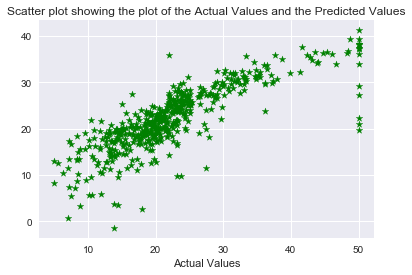

In [180]:
predictions = lr.predict(new_X)
plt.scatter(new_Y, predictions, marker = '*', color='g')
plt.xlabel('Actual Values')
plt.xlabel('Actual Values')
plt.title('Scatter plot showing the plot of the Actual Values and the Predicted Values')
plt.show()

# Test size of 90/10

In [181]:
'''Selecting the Predictors'''
new_X = X[['RM', 'LSTAT', 'PTRATIO']].copy()

'''Defining the Dependent Variable'''
new_Y = pd.DataFrame(y)

'''Using the Test Train Split Approach'''
new_XTrain, new_XTest, new_YTrain, new_YTest = train_test_split(new_X, new_Y, test_size = 0.9)
print (new_XTrain.shape, new_YTrain.shape, new_XTest.shape, new_YTest.shape)


'''Linear Regression'''
lr = LinearRegression()
lr.fit(new_XTrain, new_YTrain)

'''Validating the Model Score'''
print ('Model Score with Training Data:', lr.score(new_XTrain, new_YTrain))

'''Validating the Model with the Test Data '''
print ('Model Score with Test Data:', lr.score(new_XTest, new_YTest))

(50, 3) (50, 1) (456, 3) (456, 1)
Model Score with Training Data: 0.704492716206
Model Score with Test Data: 0.645605203831


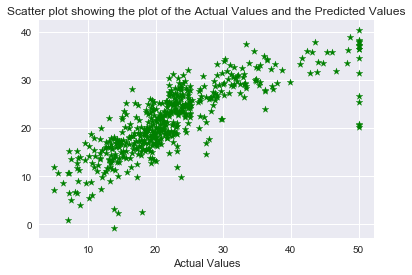

In [182]:
predictions = lr.predict(new_X)
plt.scatter(new_Y, predictions, marker = '*', color='g')
plt.xlabel('Actual Values')
plt.xlabel('Actual Values')
plt.title('Scatter plot showing the plot of the Actual Values and the Predicted Values')
plt.show()

When we set the test size of 0.7, we see that 70% of the data is used for Training Data and the rest is used as Test set. When we set the test size as 0.9, 90% of the data is used for Training Date and the rest is used for the test set. 

With 90% test size, I see extremes. I see the model behave really well, and when there is a difference between the test and the training model the spread seems to be lot bigger than what we observe with 0.7 test size. 

In both the plots we see that there is a positive correlation between the Actual Values and the Predicted Values 

### 4. Try K-Folds cross-validation with _k_ between 5-10 for your regression. 

You can use either `cross_val_score` / `cross_val_predict` or the `KFolds` iterator

- What set of variables are optimal? 
- How do your scores change?  
- How does the variance of the scores change?
- Try different folds to get a sense of how this impacts your score.

# Using the Cross_Val_Score Approach 

In [234]:
from sklearn.model_selection import cross_val_predict, cross_val_score

lr = LinearRegression()

c = cross_val_score(lr, new_X, new_Y, cv=5)

print ('C Scores: ', c)
print ('Average R Score: ', c.mean())

C Scores:  [ 0.72694149  0.71485697  0.54819014  0.18188973 -0.02186342]
Average R Score:  0.43000298318


# Using the KFold Approach 

In [236]:
from sklearn.model_selection import KFold

In [248]:
Input = input('Enter the Number of KFolds: ')

Enter the Number of KFolds: 10


In [249]:
kfolds = KFold(int(Input))

In [250]:
new_X.head()

,RM,LSTAT,PTRATIO
0,6.575,4.98,15.3
1,6.421,9.14,17.8
2,7.185,4.03,17.8
3,6.998,2.94,18.7
4,7.147,5.33,18.7


In [251]:
new_Y.head()

,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [252]:
'''Converting the DataFrames into numpy arrays to be fed into the model'''
new_x_array = np.array(new_X)
new_y_array = np.array(new_Y)
print (type(new_x_array))
print (type(new_y_array))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [253]:
print (new_x_array.shape)
print (new_Y.shape)

(506, 3)
(506, 1)


In [255]:
from sklearn.metrics import mean_squared_error

counter = 0
lr = LinearRegression()
for training_index,test_index in kfolds.split(new_x_array, new_y_array): 
    new_x_array_train = new_x_array[training_index]
    new_x_array_test = new_x_array[test_index]
    new_y_array_train = new_y_array[training_index]
    new_y_array_test = new_y_array[test_index]
    lr.fit(new_x_array_train, new_y_array_train)
    r2_score = lr.score(new_x_array_test, new_y_array_test)
    fold_predictiions = lr.predict(new_x_array_test)
    mse = mean_squared_error(new_y_array_test, fold_predictiions)
    print ('Fold: ', counter, 'mse: ', mse, 'r2: ', r2_score)
    plt.scatter()
    counter +=1 
    


Fold:  0 mse:  8.23806894343 r2:  0.763830159136
Fold:  1 mse:  9.54539109709 r2:  0.644574348611
Fold:  2 mse:  11.1646429157 r2:  -0.591616619884
Fold:  3 mse:  43.3096879647 r2:  0.558549298038
Fold:  4 mse:  27.882541433 r2:  0.604443162326
Fold:  5 mse:  25.6974740334 r2:  0.658508730719
Fold:  6 mse:  15.078663988 r2:  0.0575655944948
Fold:  7 mse:  140.664498192 r2:  0.0566188818974
Fold:  8 mse:  40.14144168 r2:  -1.12985209361
Fold:  9 mse:  9.88008842532 r2:  0.476215829734


### 5. [Bonus] optimize the $R^2$ score

Can you optimize your R^2 by selecting the best features and validating the model using train/test split and K-Folds? Set up a scheme to do the following:

1. Create a holdout test set using `train_test_split()`. 
  - We will use the training set in our cross-validation part below to find the right set of columns.
  - We will check the best set of columns that we have found against the holdout test as a final check on our work
2. Iterate through every pair of columns (use a for loop!) in the training set you created in step 1 and look at the average $R^2$ score found by `cross_val_score()`
3. Pick the pair of columns that has the highest cross-validated $R^2$ code and fit a Linear Regression using those columns as the predictors in the full training set you created in step 1.
4. Test this "final" model against the holdout test set you created in step 1. How well does it perform?

### Prepatory steps to set up the Data 

In [315]:
X.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [318]:
'''The loop below creates a feature pair as a list of list. 
The loop also takes care of see that the members of the pair are not the same'''

x_columns = list(X.columns)
features_list = []
for key, value in enumerate(x_columns): 
    for key, value1 in enumerate(x_columns): 
        if value == value1: 
            continue
        else: 
            features_list.append([value, value1])
print (features_list)

[['CRIM', 'ZN'], ['CRIM', 'INDUS'], ['CRIM', 'CHAS'], ['CRIM', 'NOX'], ['CRIM', 'RM'], ['CRIM', 'AGE'], ['CRIM', 'DIS'], ['CRIM', 'RAD'], ['CRIM', 'TAX'], ['CRIM', 'PTRATIO'], ['CRIM', 'B'], ['CRIM', 'LSTAT'], ['ZN', 'CRIM'], ['ZN', 'INDUS'], ['ZN', 'CHAS'], ['ZN', 'NOX'], ['ZN', 'RM'], ['ZN', 'AGE'], ['ZN', 'DIS'], ['ZN', 'RAD'], ['ZN', 'TAX'], ['ZN', 'PTRATIO'], ['ZN', 'B'], ['ZN', 'LSTAT'], ['INDUS', 'CRIM'], ['INDUS', 'ZN'], ['INDUS', 'CHAS'], ['INDUS', 'NOX'], ['INDUS', 'RM'], ['INDUS', 'AGE'], ['INDUS', 'DIS'], ['INDUS', 'RAD'], ['INDUS', 'TAX'], ['INDUS', 'PTRATIO'], ['INDUS', 'B'], ['INDUS', 'LSTAT'], ['CHAS', 'CRIM'], ['CHAS', 'ZN'], ['CHAS', 'INDUS'], ['CHAS', 'NOX'], ['CHAS', 'RM'], ['CHAS', 'AGE'], ['CHAS', 'DIS'], ['CHAS', 'RAD'], ['CHAS', 'TAX'], ['CHAS', 'PTRATIO'], ['CHAS', 'B'], ['CHAS', 'LSTAT'], ['NOX', 'CRIM'], ['NOX', 'ZN'], ['NOX', 'INDUS'], ['NOX', 'CHAS'], ['NOX', 'RM'], ['NOX', 'AGE'], ['NOX', 'DIS'], ['NOX', 'RAD'], ['NOX', 'TAX'], ['NOX', 'PTRATIO'], ['NOX', 

##### 1. Create a holdout test set using train_test_split().

In [312]:
'''Selecting the Predictors'''
new_X = X[['RM', 'LSTAT']].copy()

'''Defining the Dependent Variable'''
new_Y = pd.DataFrame(y)

'''Using the Test Train Split Approach'''
new_XTrain, new_XTest, new_YTrain, new_YTest = train_test_split(new_X, new_Y, test_size = 0.5)

'''Linear Regression'''
lr = LinearRegression()
lr.fit(new_XTrain, new_YTrain)

'''Validating the Model Score'''
print ('Model Score with Training Data:', lr.score(new_XTrain, new_YTrain))

Model Score with Training Data: 0.647543462495


###### 2. Iterate through every pair of columns (use a for loop!) in the training set you created in step 1 and look at the average  R2R2  score found by cross_val_score()

In [319]:
from sklearn.model_selection import cross_val_predict, cross_val_score
lr = LinearRegression()

r2_score_features_list = []
r2_score_list = []

for key, features in enumerate(features_list): 
    
    '''Selecting the Predictors'''
    new_X = X[features].copy()

    '''Defining the Dependent Variable'''
    new_Y = pd.DataFrame(y)

    '''Using the Cross Val Approach'''
    c = cross_val_score(lr, new_X, new_Y, cv=5)
    
    '''Validating the Model Score'''
    r2_score_features_list.append(features) 
    r2_score_list.append(c.mean())
      
print ('Best Feature Pair with the highest R Score: ', r2_score_features_list[np.argmax(r2_score_list)])
print ('R Score for the Best Feature Pair: ', r2_score_list[np.argmax(r2_score_list)])

Best Feature Pair with the highest R Score:  ['LSTAT', 'PTRATIO']
R Score for the Best Feature Pair:  0.429881613586


##### 3. Pick the pair of columns that has the highest cross-validated  R2R2  code and fit a Linear Regression using those columns as the predictors in the full training set you created in step 1.

In [321]:
'''Selecting the Predictors'''
new_X = X[['LSTAT', 'PTRATIO']].copy()

'''Defining the Dependent Variable'''
new_Y = pd.DataFrame(y)

'''Using the Test Train Split Approach'''
new_XTrain, new_XTest, new_YTrain, new_YTest = train_test_split(new_X, new_Y, test_size = 0.5)

'''Linear Regression'''
lr = LinearRegression()
lr.fit(new_XTrain, new_YTrain)

'''Validating the Model Score'''
print ('Model Score with Training Data:', lr.score(new_XTrain, new_YTrain))

Model Score with Training Data: 0.549865008146


#### 4. Test this "final" model against the holdout test set you created in step 1. How well does it perform?

In [323]:
print ('Model Score with Test Data:', lr.score(new_XTest, new_YTest))

Model Score with Test Data: 0.657856330843


### 5.1 Can you explain what could be wrong with this approach?

1. One model uses a training data (subset of the entire) data to build the model, and we use the test data to test the hypothesis 
2. The other model runs the model on the entire dataset (cross-val). In addition the model runs K times per iteration (k = 5 in our example) 

### 6. [Bonus] Explore another target variable 

Can you find another response variable, given a combination of predictors, that can be predicted accurately through the exploration of different predictors in this dataset?

> *Tip: Check out pairplots, coefficients, and pearson scores.*

In [327]:
X.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

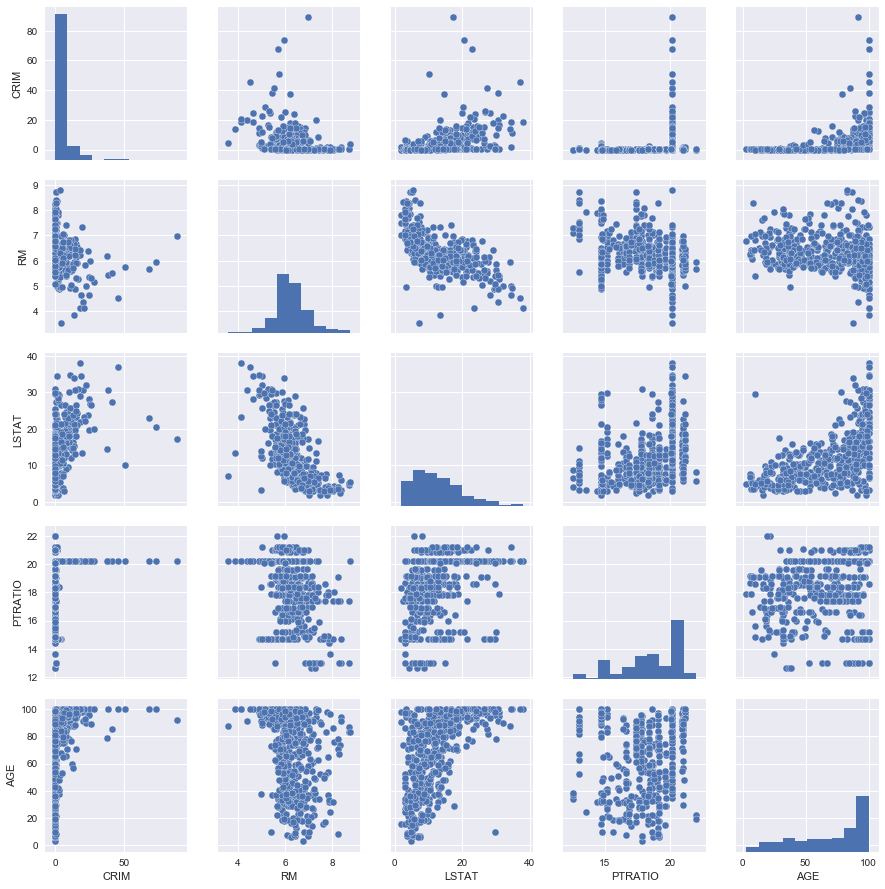

In [331]:
sns.pairplot(X[['CRIM', 'RM', 'LSTAT', 'PTRATIO', 'AGE']])

RM is more or less positively correlated with the Price (o). Hence RM may be good response variable based on the predictors  